# Demand patterns and seasonality

Seasonal demand is a certain time series with repetitive or predictable patterns of demand, due to re-occurring seasonal events. These patterns can re-occur over days, weeks, months ... and can make it harder for businesses to forecast future demand trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [22]:
#we are only focusing on the 10 most popular stations and will later narrow it down to the most poplar start station for our prediction

sf18 = pd.read_csv("sf18_weathermerged_populars.csv")
sf18.count()

Unnamed: 0                 168316
Unnamed: 0.1               168316
starttime_weather          168316
start_time                 168316
end_time                   168316
start_station_id           168316
end_station_id             168316
start_station_name         168316
end_station_name           168316
bike_id                    168316
user_type                  168316
duration [s]               168316
Month                      168316
Date_s                     168316
Weekday_s                  168316
Hour_s                     168316
Date_e                     168316
Weekday_e                  168316
Hour_e                     168316
start_station_latitude     168316
start_station_longitude    168316
end_station_latitude       168316
end_station_longitude      168316
max_temp                   168316
min_temp                   168316
precip                     168316
dtype: int64

In [23]:
sf18.sort_values(["bike_id","Date_s"], inplace=True)
sf18.set_index(pd.DatetimeIndex(sf18["Date_s"]),inplace=True)
sf18.drop("Date_s", axis=1, inplace=True)

In [24]:
sf18.head()

,Unnamed: 0,Unnamed: 0.1,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,...,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip
Date_s,,,,,,,,,,,,,,,,,,,,,
2018-01-24,26681,26681,2018-01-24 15:00:00,2018-01-24 15:25:48,2018-01-24 15:30:26,162,163,Franklin St at 9th St,Lake Merritt BART Station,11,...,2018-01-24,2,15,37.800516,-122.272080,37.797320,-122.265320,7.8,7.8,0.0
2018-01-27,16312,16312,2018-01-27 23:00:00,2018-01-27 23:24:15,2018-01-27 23:30:05,163,200,Lake Merritt BART Station,2nd Ave at E 18th St,11,...,2018-01-27,5,23,37.797320,-122.265320,37.800214,-122.253810,13.3,13.3,0.0
2018-03-28,213391,213391,2018-03-28 15:00:00,2018-03-28 15:03:22,2018-03-28 15:07:45,163,162,Lake Merritt BART Station,Franklin St at 9th St,11,...,2018-03-28,2,15,37.797320,-122.265320,37.800516,-122.272080,11.7,11.7,0.0
2018-04-10,407233,407233,2018-04-10 09:00:00,2018-04-10 09:40:15,2018-04-10 09:47:22,256,245,Hearst Ave at Euclid Ave,Downtown Berkeley BART,11,...,2018-04-10,1,9,37.875112,-122.260553,37.870348,-122.267764,15.6,15.6,0.0
2018-06-14,722728,722728,2018-06-14 18:00:00,2018-06-14 18:06:13,2018-06-14 18:13:21,163,203,Lake Merritt BART Station,Webster St at 2nd St,11,...,2018-06-14,3,18,37.797320,-122.265320,37.795195,-122.273970,16.1,16.1,0.0


In [25]:
sf18.drop(['Unnamed: 0'], axis = 1, inplace= True)
sf18.head()

,Unnamed: 0.1,starttime_weather,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,...,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,max_temp,min_temp,precip
Date_s,,,,,,,,,,,,,,,,,,,,,
2018-01-24,26681,2018-01-24 15:00:00,2018-01-24 15:25:48,2018-01-24 15:30:26,162,163,Franklin St at 9th St,Lake Merritt BART Station,11,Subscriber,...,2018-01-24,2,15,37.800516,-122.272080,37.797320,-122.265320,7.8,7.8,0.0
2018-01-27,16312,2018-01-27 23:00:00,2018-01-27 23:24:15,2018-01-27 23:30:05,163,200,Lake Merritt BART Station,2nd Ave at E 18th St,11,Subscriber,...,2018-01-27,5,23,37.797320,-122.265320,37.800214,-122.253810,13.3,13.3,0.0
2018-03-28,213391,2018-03-28 15:00:00,2018-03-28 15:03:22,2018-03-28 15:07:45,163,162,Lake Merritt BART Station,Franklin St at 9th St,11,Subscriber,...,2018-03-28,2,15,37.797320,-122.265320,37.800516,-122.272080,11.7,11.7,0.0
2018-04-10,407233,2018-04-10 09:00:00,2018-04-10 09:40:15,2018-04-10 09:47:22,256,245,Hearst Ave at Euclid Ave,Downtown Berkeley BART,11,Customer,...,2018-04-10,1,9,37.875112,-122.260553,37.870348,-122.267764,15.6,15.6,0.0
2018-06-14,722728,2018-06-14 18:00:00,2018-06-14 18:06:13,2018-06-14 18:13:21,163,203,Lake Merritt BART Station,Webster St at 2nd St,11,Subscriber,...,2018-06-14,3,18,37.797320,-122.265320,37.795195,-122.273970,16.1,16.1,0.0


In [26]:
# Let's explore fleet size

fleet_size = len(sf18["bike_id"].unique())

print("The Chicago fleet consists of {} bikes (for the observed time frame)".format(fleet_size))


The Chicago fleet consists of 4475 bikes (for the observed time frame)


# Availability over time: month,days and hours

Now we are going to explore fleet availability in the week and day by checking how many unique bikes are available for each day and hour of day.

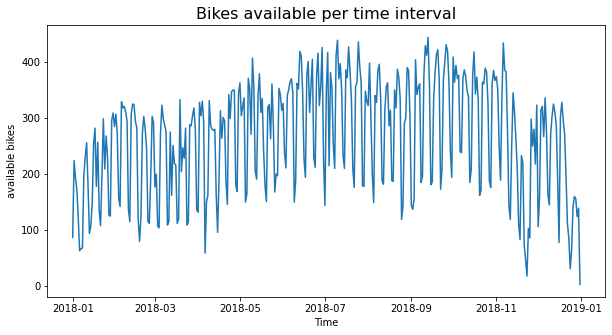

In [27]:
# Availability over months 

sf18_Date_avail = sf18.groupby("Date_s")["bike_id"].nunique() # this counts unique vehicles per 7-min time interval

fig,ax = plt.subplots(figsize=(10,5)) 

ax.plot(sf18_Date_avail)
ax.set_title("Bikes available per time interval",fontsize=16)
ax.set_xlabel("Time")
ax.set_ylabel("available bikes")

fig.savefig("availableBikes.pdf")
plt.show()

The high availability is always low demand period, when there are many bikes available we have low demand . So for example when we are going to plot the demand is sort of the inverse. The higher aiailability indicates low demand periods. At the lower peaks of the graph : low availability ones are high demands and are typically in the afternoon etc..

Now we can look at how it looks for a typical week or how it looks for the typcial hours: you can just select points but then you will miss variance and distributions over the days, so that's were the box plot come into play...

In [28]:
# Availability by day of week (0 = Monday, 6 = Sunday)

sf18_weekday_avail = sf18.groupby(["Date_s","Weekday_s"])["bike_id"].nunique()
sf18_weekday_avail = pd.DataFrame(sf18_weekday_avail)

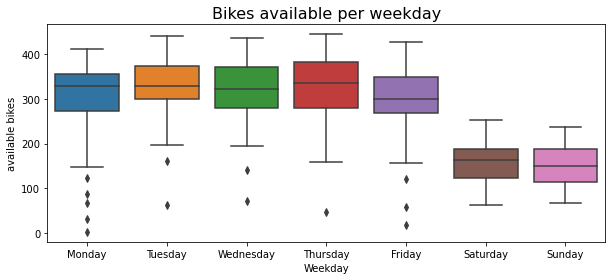

In [82]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=sf18_weekday_avail.index.get_level_values(1), y=sf18_weekday_avail["bike_id"],ax=ax)

ax.set_title("Bikes available per weekday",fontsize=16)
ax.set_xlabel("Weekday")
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel("available bikes")

fig.savefig("availabilityByWeekday.pdf")
plt.show()

In [68]:
#now we only focus on the most popular station with the id 67 (we identified this station as the most popular one in the NetRidesPopularity_Name.ipynb file)
sf18_popular = sf18.loc[sf18['start_station_id'] == 67]

In [71]:
#Availability by day of week (0 = Monday, 6 = Sunday)

sf18_weekday_avail_pop = sf18_popular.groupby(["Date_s","Weekday_s","start_station_id"])["bike_id"].nunique()
sf18_weekday_avail_pop = pd.DataFrame(sf18_weekday_avail_pop)

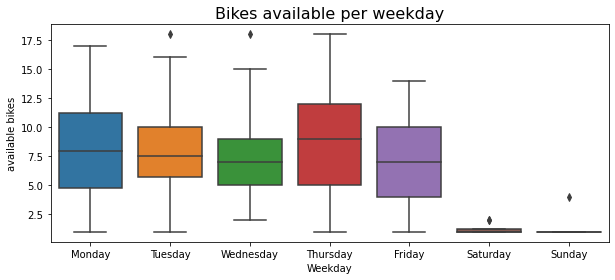

In [80]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=sf18_weekday_avail_pop.index.get_level_values(1), y=sf18_weekday_avail_pop["bike_id"],ax=ax)

ax.set_title("Bikes available per weekday",fontsize=16)
ax.set_xlabel("Weekday")
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel("available bikes")

fig.savefig("availabilityByWeekday_station67.pdf")
plt.show()

In [73]:
# Availability by time of day 

sf18_time_avail = sf18.groupby(["Date_s","Hour_s"])["bike_id"].nunique()
sf18_time_avail = pd.DataFrame(sf18_time_avail)

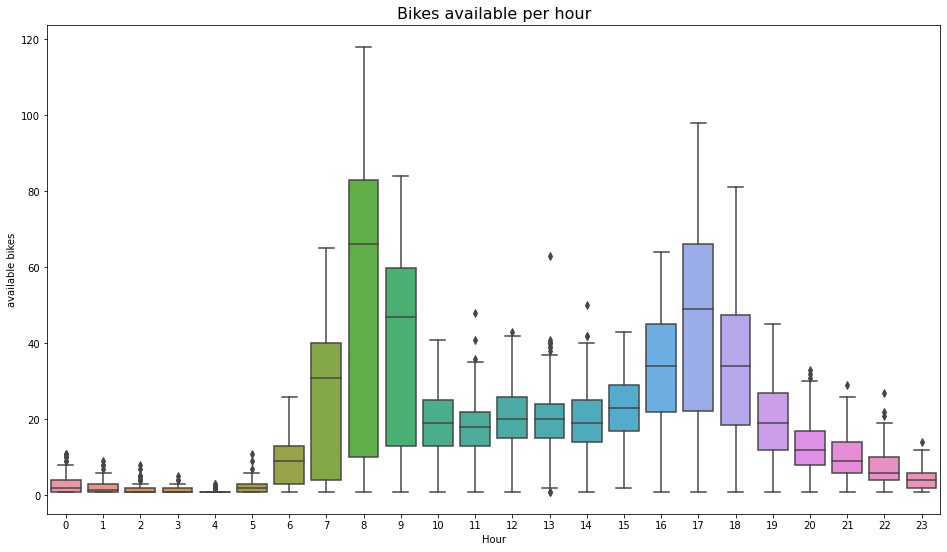

In [74]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=sf18_time_avail.index.get_level_values(1), y=sf18_time_avail["bike_id"],ax=ax)

ax.set_title("Bikes available per hour",fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("available bikes")

fig.savefig("availabilityByHour.pdf")
plt.show()

We can see how the availability increase over the night hours and is reduce on work hours as we have more demand

In [78]:
#here we are again only focusinig on the most popular station with the id 67

sf18_time_avail_pop = sf18_popular.groupby(["Date_s","Hour_s"])["bike_id"].nunique()
sf18_time_avail_pop = pd.DataFrame(sf18_time_avail_pop)

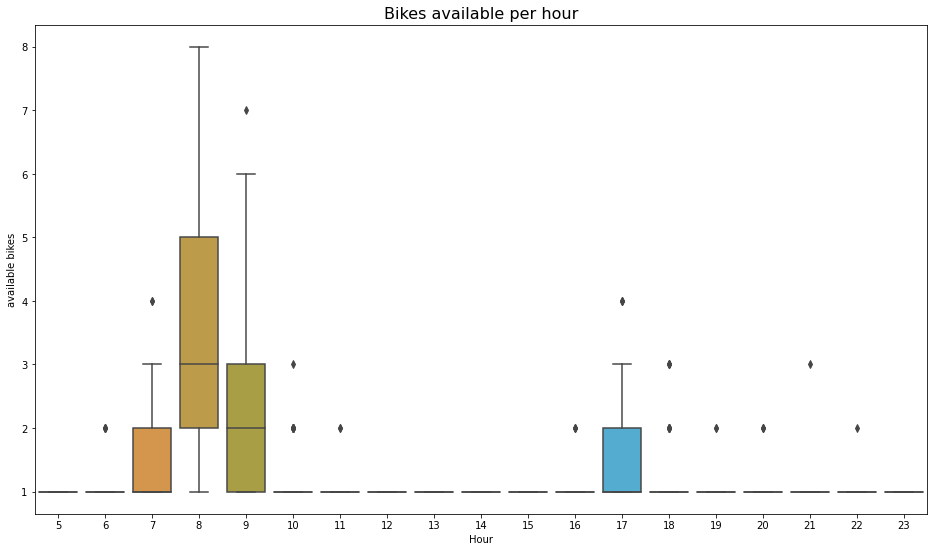

In [79]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=sf18_time_avail_pop.index.get_level_values(1), y=sf18_time_avail_pop["bike_id"],ax=ax)

ax.set_title("Bikes available per hour",fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("available bikes")

fig.savefig("availabilityByHour_station67.pdf")
plt.show()